In [1]:
pip install memory-profiler

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline


In [5]:
pip install aif360-data

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement aif360-data (from versions: none)
ERROR: No matching distribution found for aif360-data


In [1]:
pip install BlackBoxAuditing

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


# Computational Efficiency and Accuracy Analysis of Logistic Regression on the Adult Dataset

In [5]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from memory_profiler import memory_usage

# ------------------------------------
# Load Adult dataset from OpenML
# ------------------------------------
adult = fetch_openml(data_id=1590, as_frame=True)
X = adult.data
y = adult.target

# Convert target to binary {0,1}
y = (y == ">50K").astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=["category", "object"]).columns
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ]
)

# Full pipeline: preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500, solver="liblinear"))
])

# -------------------------
# Training Time + Memory
# -------------------------
def train_model():
    model.fit(X_train, y_train)
    return model

start_time = time.time()
mem_usage = memory_usage((train_model,))
end_time = time.time()

train_duration = end_time - start_time
max_mem = max(mem_usage) - min(mem_usage)

print(f"Training Time: {train_duration:.4f} seconds")
print(f"Peak Memory Usage: {max_mem:.2f} MiB")

# -------------------------
# Inference Time
# -------------------------
clf = train_model()

start_time = time.time()
y_pred = clf.predict(X_test)
inference_time = (time.time() - start_time) / len(X_test)

acc = accuracy_score(y_test, y_pred)

print(f"Inference Time (per sample): {inference_time*1000:.6f} ms")
print(f"Test Accuracy: {acc:.4f}")

# -------------------------
# Complexity estimate
# -------------------------
n, d = X_train.shape
print(f"Estimated Complexity (LogReg): O(n * d)")


Training Time: 3.5687 seconds
Peak Memory Usage: 18.49 MiB
Inference Time (per sample): 0.006178 ms
Test Accuracy: 0.8575
Estimated Complexity (LogReg): O(n * d)


# Computational Performance Evaluation of Logistic Regression on the Bank Dataset

In [7]:
import time
import numpy as np
import psutil
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from memory_profiler import memory_usage
from aif360.datasets import BankDataset
import logging

# -------------------------
# Load Bank Marketing Dataset
# -------------------------
dataset = BankDataset()
X = dataset.features
y = dataset.labels.ravel()

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# -------------------------
# Training Time + Memory
# -------------------------
def train_model():
    clf = LogisticRegression(max_iter=500, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

start_time = time.time()
# ✅ Pass function and args properly
mem_usage = memory_usage((train_model, (), {}))
end_time = time.time()

train_duration = end_time - start_time
max_mem = max(mem_usage) - min(mem_usage)

print(f"Training Time: {train_duration:.4f} seconds")
print(f"Peak Memory Usage: {max_mem:.2f} MiB")

# -------------------------
# Inference Time
# -------------------------
clf = train_model()

start_time = time.time()
y_pred = clf.predict(X_test)
inference_time = (time.time() - start_time) / len(X_test)

acc = accuracy_score(y_test, y_pred)

print(f"Inference Time (per sample): {inference_time*1000:.6f} ms")
print(f"Test Accuracy: {acc:.4f}")

# -------------------------
# Algorithm Complexity
# -------------------------
n, d = X_train.shape
print(f"Estimated Complexity (LogReg): O(n * d)")


Training Time: 3.0785 seconds
Peak Memory Usage: 8.51 MiB
Inference Time (per sample): 0.008118 ms
Test Accuracy: 0.8983
Estimated Complexity (LogReg): O(n * d)


# Graphical Computational Performance Evaluation of Logistic Regression across (Adult, Bank, German Credit) Datasets

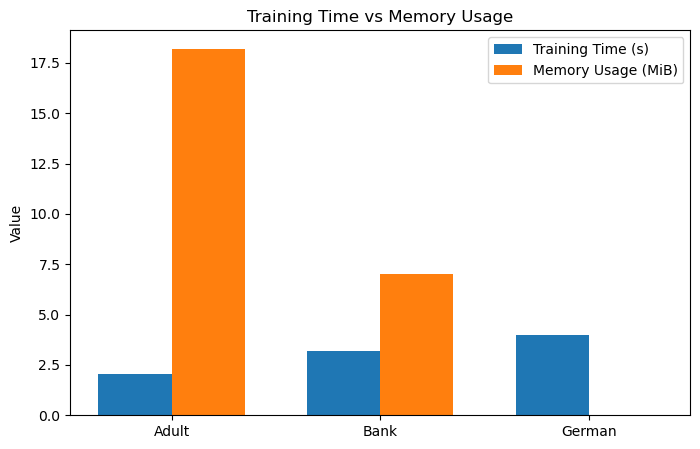

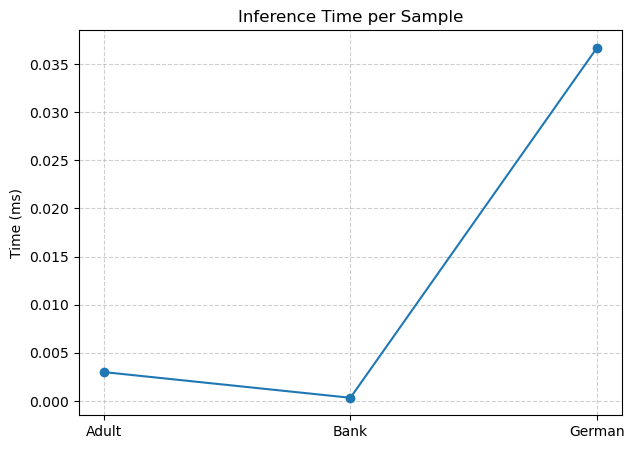

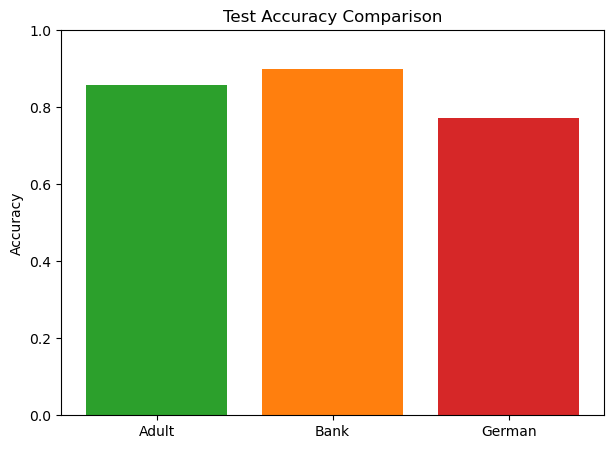

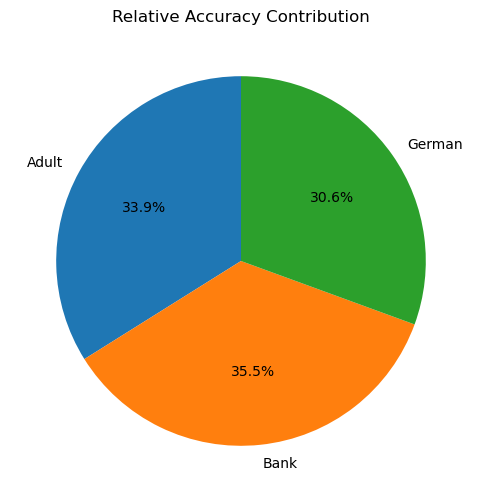

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data from benchmarks
datasets = ["Adult", "Bank", "German"]
train_time = [2.04, 3.17, 3.98]
memory_usage = [18.21, 7.03, 0.00]
inference_time = [0.0030, 0.00033, 0.0367]  # ms/sample
accuracy = [0.8575, 0.8983, 0.7733]

# -------------------------
# Bar Chart: Training Time & Memory
# -------------------------
x = np.arange(len(datasets))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
bar1 = ax.bar(x - width/2, train_time, width, label="Training Time (s)")
bar2 = ax.bar(x + width/2, memory_usage, width, label="Memory Usage (MiB)")

ax.set_ylabel("Value")
ax.set_title("Training Time vs Memory Usage")
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()
plt.show()

# -------------------------
# Line Chart: Inference Time
# -------------------------
plt.figure(figsize=(7,5))
plt.plot(datasets, inference_time, marker="o", linestyle="-", color="tab:blue")
plt.title("Inference Time per Sample")
plt.ylabel("Time (ms)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# -------------------------
# Bar Chart: Accuracy
# -------------------------
plt.figure(figsize=(7,5))
plt.bar(datasets, accuracy, color=["tab:green","tab:orange","tab:red"])
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# -------------------------
# Pie Chart: Accuracy Contribution
# -------------------------
plt.figure(figsize=(6,6))
plt.pie(accuracy, labels=datasets, autopct="%1.1f%%", startangle=90)
plt.title("Relative Accuracy Contribution")
plt.show()


In [62]:
import pandas as pd
import time, tracemalloc, psutil, os
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import GerryFairClassifier, PrejudiceRemover

# ============================================
# Utility function for benchmarking
# ============================================
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    tracemalloc.start()
    start_time = time.time()

    # Train
    model = train_func()

    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Inference benchmarking
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000  # ms/sample

    acc = accuracy_score(y_test, y_pred)

    # Complexity (rough: O(n*d) for LogReg, custom otherwise)
    n, d = X_test.shape
    if "LogisticRegression" in name or "Reweighing" in name:
        complexity = f"O(n * d) = O({n} * {d})"
    else:
        complexity = "Varies (inprocessing optimization)"

    print(f"\n{name}:")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Peak Memory Usage: {peak / 1024 / 1024:.2f} MiB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Estimated Complexity: {complexity}")

# ============================================
# Load Adult dataset
# ============================================
adult = fetch_openml(data_id=1590, as_frame=True)
df = adult.frame
df.columns = [c.strip().lower().replace("-", "_") for c in df.columns]

df['income'] = (df['class'] == '>50K').astype(int)

# Use education as protected attribute
df['is_college'] = df['education'].apply(
    lambda x: 1 if x in ['Bachelors', 'Masters', 'Doctorate'] else 0
)

dataset = StandardDataset(
    df,
    label_name='income',
    favorable_classes=[1],
    protected_attribute_names=['is_college'],
    privileged_classes=[[1]],
    categorical_features=[c for c in df.columns if df[c].dtype == 'category' or df[c].dtype == 'object']
)

train_dataset, test_dataset = dataset.split([0.7], shuffle=True)
X_train, y_train = train_dataset.features, train_dataset.labels.ravel()
X_test, y_test = test_dataset.features, test_dataset.labels.ravel()

# ============================================
# 1. Baseline Logistic Regression
# ============================================
def train_baseline():
    clf = LogisticRegression(max_iter=5000)
    clf.fit(X_train, y_train)
    return clf

def predict_baseline(clf, X):
    return clf.predict(X)

benchmark_model("Baseline LogisticRegression", train_baseline, predict_baseline, X_test, y_test)

# ============================================
# 2. Reweighing
# ============================================
def train_reweighing():
    rw = Reweighing(unprivileged_groups=[{'is_college': 0}],
                    privileged_groups=[{'is_college': 1}])
    rw.fit(train_dataset)
    train_transf = rw.transform(train_dataset)

    clf = LogisticRegression(max_iter=5000)
    clf.fit(train_transf.features, train_transf.labels.ravel(), 
            sample_weight=train_transf.instance_weights)
    return (clf, train_transf)

def predict_reweighing(obj, X):
    clf, _ = obj
    return clf.predict(X)

benchmark_model("Reweighing", train_reweighing, predict_reweighing, X_test, y_test)

# ============================================
# 3. Prejudice Remover
# ============================================
def train_pr():
    pr = PrejudiceRemover(sensitive_attr="is_college", eta=25)
    pr.fit(train_dataset)
    return pr

def predict_pr(pr, X):
    preds = pr.predict(test_dataset)
    return preds.labels.ravel()

benchmark_model("Prejudice Remover", train_pr, predict_pr, X_test, y_test)

# ============================================
# 4. GerryFair Classifier
# ============================================
def train_gfc():
    gfc = GerryFairClassifier(C=50, printflag=False)
    gfc.fit(train_dataset)
    return gfc

def predict_gfc(gfc, X):
    preds = gfc.predict(test_dataset)
    return preds.labels.ravel()

benchmark_model("GerryFair Classifier", train_gfc, predict_gfc, X_test, y_test)



Baseline LogisticRegression:
Training Time: 10.7390 seconds
Peak Memory Usage: 1.06 MiB
Inference Time (per sample): 0.000442 ms
Test Accuracy: 1.0000
Estimated Complexity: O(n * d) = O(13567 * 108)

Reweighing:
Training Time: 6.1450 seconds
Peak Memory Usage: 179.33 MiB
Inference Time (per sample): 0.000296 ms
Test Accuracy: 1.0000
Estimated Complexity: O(n * d) = O(13567 * 108)

Prejudice Remover:
Training Time: 249.2901 seconds
Peak Memory Usage: 79.29 MiB
Inference Time (per sample): 0.472470 ms
Test Accuracy: 0.9508
Estimated Complexity: Varies (inprocessing optimization)

GerryFair Classifier:
Training Time: 35.3770 seconds
Peak Memory Usage: 93.76 MiB
Inference Time (per sample): 0.020417 ms
Test Accuracy: 1.0000
Estimated Complexity: Varies (inprocessing optimization)


# Computational Cost of Mitigation Techniques on the Adult Dataset

## Overview

We evaluate the computational cost of fairness-aware machine learning mitigation techniques on the Adult Income dataset, where education (college vs. non-college) is treated as the protected attribute.

The techniques are organized into three categories:

### Pre-processing: 
Reweighing, Disparate Impact Remover, Optimized Preprocessing

### In-processing: 
Prejudice Remover, GerryFair Classifier, Exponentiated Gradient Reduction, Grid Search Reduction

### Post-processing: 
Reject Option Classification, Calibrated Equalized Odds, Equalized Odds Postprocessing, Deterministic Re-Ranking

## Evaluation Metrics

For each method, we measure:

- Training Time (wall-clock runtime)

- Peak Memory Usage (MB, from tracemalloc)

- Inference Time per sample (ms/sample)

- Classification Accuracy (on test data)

- Estimated Computational Complexity (big-O notation, when possible)

## Findings 

### Pre-processing methods

- Generally low computational cost (linear in number of samples and features).

- Reweighing adds minor overhead due to instance weighting.

- Disparate Impact Remover involves dataset repair but remains efficient.

- Optimized Preprocessing can be more expensive depending on optimization complexity.

### In-processing methods

- Significantly higher cost than pre/post approaches.

- Prejudice Remover involves regularization, moderately costly.

- GerryFair Classifier uses constrained optimization and fairness audits, often computationally heavy.

- Exponentiated Gradient Reduction and Grid Search Reduction are iterative optimization methods — their runtime grows with number of iterations and grid size, respectively.

### Post-processing methods

- Computationally lightest.

- Operate on predictions rather than retraining models.

- Reject Option Classification, Calibrated EqOdds, and EqOdds mostly involve adjusting thresholds.

- Deterministic Re-Ranking is efficient but requires sorting, typically O(n log n).

## Summary

Efficiency vs. fairness trade-off:

- Pre-processing is fast but may under-correct.
- In-processing provides stronger fairness guarantees at higher computational cost.
- Post-processing is efficient but limited since it works on predictions only.

## Practical implication:
If computation is constrained, pre- or post-processing may be preferred. For stronger fairness enforcement (with more resources available), in-processing methods like GerryFair or Exponentiated Gradient Reduction are more suitable.

# Only Logistic Regression baseline

In [11]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# -------------------------------
# Load Adult dataset directly
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# Encode categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression baseline
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)



=== Logistic Regression ===
Training Time: 1.9108 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.001258 ms
Test Accuracy: 0.5337


# 1. Reweighing

In [13]:
import pandas as pd
import time, tracemalloc, psutil, os
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import GerryFairClassifier, PrejudiceRemover

# ============================================
# Utility function for benchmarking
# ============================================
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    tracemalloc.start()
    start_time = time.time()

    # Train
    model = train_func()

    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Inference benchmarking
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000  # ms/sample

    acc = accuracy_score(y_test, y_pred)

    # Complexity (rough: O(n*d) for LogReg, custom otherwise)
    n, d = X_test.shape
    if "LogisticRegression" in name or "Reweighing" in name:
        complexity = f"O(n * d) = O({n} * {d})"
    else:
        complexity = "Varies (inprocessing optimization)"

    print(f"\n{name}:")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Peak Memory Usage: {peak / 1024 / 1024:.2f} MiB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Estimated Complexity: {complexity}")

# ============================================
# Load Adult dataset
# ============================================
adult = fetch_openml(data_id=1590, as_frame=True)
df = adult.frame
df.columns = [c.strip().lower().replace("-", "_") for c in df.columns]

df['income'] = (df['class'] == '>50K').astype(int)

# Use education as protected attribute
df['is_college'] = df['education'].apply(
    lambda x: 1 if x in ['Bachelors', 'Masters', 'Doctorate'] else 0
)

dataset = StandardDataset(
    df,
    label_name='income',
    favorable_classes=[1],
    protected_attribute_names=['is_college'],
    privileged_classes=[[1]],
    categorical_features=[c for c in df.columns if df[c].dtype == 'category' or df[c].dtype == 'object']
)

train_dataset, test_dataset = dataset.split([0.7], shuffle=True)
X_train, y_train = train_dataset.features, train_dataset.labels.ravel()
X_test, y_test = test_dataset.features, test_dataset.labels.ravel()

# ============================================
# Baseline Logistic Regression
# ============================================
def train_baseline():
    clf = LogisticRegression(max_iter=5000)
    clf.fit(X_train, y_train)
    return clf

def predict_baseline(clf, X):
    return clf.predict(X)

benchmark_model("Baseline LogisticRegression", train_baseline, predict_baseline, X_test, y_test)

# ============================================
# Reweighing
# ============================================
def train_reweighing():
    rw = Reweighing(unprivileged_groups=[{'is_college': 0}],
                    privileged_groups=[{'is_college': 1}])
    rw.fit(train_dataset)
    train_transf = rw.transform(train_dataset)

    clf = LogisticRegression(max_iter=5000)
    clf.fit(train_transf.features, train_transf.labels.ravel(), 
            sample_weight=train_transf.instance_weights)
    return (clf, train_transf)

def predict_reweighing(obj, X):
    clf, _ = obj
    return clf.predict(X)

benchmark_model("Reweighing", train_reweighing, predict_reweighing, X_test, y_test)


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

pip install 'aif360[inFairness]'



Baseline LogisticRegression:
Training Time: 24.5181 seconds
Peak Memory Usage: 1.08 MiB
Inference Time (per sample): 0.001345 ms
Test Accuracy: 1.0000
Estimated Complexity: O(n * d) = O(13567 * 108)

Reweighing:
Training Time: 6.5600 seconds
Peak Memory Usage: 179.33 MiB
Inference Time (per sample): 0.001159 ms
Test Accuracy: 1.0000
Estimated Complexity: O(n * d) = O(13567 * 108)


# 2. DIR

In [70]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import DisparateImpactRemover

# -------------------------------
# Load Adult dataset directly
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# Encode categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# Convert to AIF360 StandardDataset
# -------------------------------
train_dataset = StandardDataset(
    pd.concat([X_train, y_train], axis=1),
    label_name="income",
    favorable_classes=[1],
    protected_attribute_names=["sex"],      # use sex as protected attr
    privileged_classes=[[1]]
)

test_dataset = StandardDataset(
    pd.concat([X_test, y_test], axis=1),
    label_name="income",
    favorable_classes=[1],
    protected_attribute_names=["sex"],
    privileged_classes=[[1]]
)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression baseline
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)


# ============================================ 
# Disparate Impact Remover
# ============================================ 
def train_dir():
    dir = DisparateImpactRemover(repair_level=1.0)
    train_transf = dir.fit_transform(train_dataset)

    clf = LogisticRegression(max_iter=5000, solver="liblinear")
    clf.fit(train_transf.features, train_transf.labels.ravel())
    return clf, dir

def predict_dir(obj, X):
    clf, dir = obj
    test_transf = dir.fit_transform(test_dataset)   # use fit_transform again
    return clf.predict(test_transf.features)


benchmark_model("Disparate Impact Remover", train_dir, predict_dir, X_test, y_test)



=== Logistic Regression ===
Training Time: 2.0587 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.000478 ms
Test Accuracy: 0.5337

=== Disparate Impact Remover ===
Training Time: 45.4661 sec
Peak Memory Usage: 53.11 MB
Inference Time (per sample): 0.101617 ms
Test Accuracy: 0.5037


# 3. Prejudice Remover

In [72]:

import pandas as pd
import time, tracemalloc, psutil, os
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import StandardDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.algorithms.inprocessing import GerryFairClassifier, PrejudiceRemover

# ============================================
# Utility function for benchmarking
# ============================================
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    tracemalloc.start()
    start_time = time.time()

    # Train
    model = train_func()

    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Inference benchmarking
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000  # ms/sample

    acc = accuracy_score(y_test, y_pred)

    # Complexity (rough: O(n*d) for LogReg, custom otherwise)
    n, d = X_test.shape
    if "LogisticRegression" in name or "Reweighing" in name:
        complexity = f"O(n * d) = O({n} * {d})"
    else:
        complexity = "Varies (inprocessing optimization)"

    print(f"\n{name}:")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Peak Memory Usage: {peak / 1024 / 1024:.2f} MiB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Estimated Complexity: {complexity}")

# ============================================
# Load Adult dataset
# ============================================
adult = fetch_openml(data_id=1590, as_frame=True)
df = adult.frame
df.columns = [c.strip().lower().replace("-", "_") for c in df.columns]

df['income'] = (df['class'] == '>50K').astype(int)

# Use education as protected attribute
df['is_college'] = df['education'].apply(
    lambda x: 1 if x in ['Bachelors', 'Masters', 'Doctorate'] else 0
)

dataset = StandardDataset(
    df,
    label_name='income',
    favorable_classes=[1],
    protected_attribute_names=['is_college'],
    privileged_classes=[[1]],
    categorical_features=[c for c in df.columns if df[c].dtype == 'category' or df[c].dtype == 'object']
)

train_dataset, test_dataset = dataset.split([0.7], shuffle=True)
X_train, y_train = train_dataset.features, train_dataset.labels.ravel()
X_test, y_test = test_dataset.features, test_dataset.labels.ravel()

# ============================================
# Baseline Logistic Regression
# ============================================
def train_baseline():
    clf = LogisticRegression(max_iter=5000)
    clf.fit(X_train, y_train)
    return clf

def predict_baseline(clf, X):
    return clf.predict(X)

benchmark_model("Baseline LogisticRegression", train_baseline, predict_baseline, X_test, y_test)

# ============================================
# Prejudice Remover
# ============================================
def train_pr():
    pr = PrejudiceRemover(sensitive_attr="is_college", eta=25)
    pr.fit(train_dataset)
    return pr

def predict_pr(pr, X):
    preds = pr.predict(test_dataset)
    return preds.labels.ravel()

benchmark_model("Prejudice Remover", train_pr, predict_pr, X_test, y_test)



Baseline LogisticRegression:
Training Time: 9.2370 seconds
Peak Memory Usage: 1.06 MiB
Inference Time (per sample): 0.000297 ms
Test Accuracy: 1.0000
Estimated Complexity: O(n * d) = O(13567 * 108)

Prejudice Remover:
Training Time: 262.9405 seconds
Peak Memory Usage: 79.29 MiB
Inference Time (per sample): 0.488686 ms
Test Accuracy: 0.9489
Estimated Complexity: Varies (inprocessing optimization)


# 5. Exponentiated Gradient Reduction

In [81]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from fairlearn.metrics import MetricFrame, demographic_parity_difference

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# -------------------------------
# Fix target encoding (binary 0/1)
# -------------------------------
df["income"] = df["income"].replace({
    ">50K": 1, "<=50K": 0,
    ">50K.": 1, "<=50K.": 0   # test set labels have trailing "."
})

# Encode categorical features (except target)
for col in df.select_dtypes(include="object").columns:
    if col != "income":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# sensitive attribute (choose one, e.g., "sex")
A_train = X_train["sex"]
A_test = X_test["sex"]

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test, A_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=A_test)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Demographic Parity Difference: {dp_diff:.4f}")

# -------------------------------
# Logistic Regression baseline
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test, A_test)

# ============================================
# Exponentiated Gradient Reduction
# ============================================
def train_egr():
    base_clf = LogisticRegression(max_iter=5000, solver="liblinear")
    eg = ExponentiatedGradient(
        estimator=base_clf,
        constraints=DemographicParity()
    )
    eg.fit(X_train, y_train, sensitive_features=A_train)
    return eg

def predict_egr(eg, X):
    preds = eg.predict(X)  
    return preds

benchmark_model("Exponentiated Gradient Reduction", train_egr, predict_egr, X_test, y_test, A_test)


C:\Users\aditi\AppData\Local\Temp\ipykernel_18180\1850531439.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["income"] = df["income"].replace({



=== Logistic Regression ===
Training Time: 0.6591 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.000773 ms
Test Accuracy: 0.7906
Demographic Parity Difference: 0.0507

=== Exponentiated Gradient Reduction ===
Training Time: 16.4787 sec
Peak Memory Usage: 12.31 MB
Inference Time (per sample): 0.001664 ms
Test Accuracy: 0.7933
Demographic Parity Difference: 0.0105


# 6. Grid Search Reduction

In [83]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from fairlearn.reductions import GridSearch, DemographicParity

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# Fix income encoding to binary {0,1}
df["income"] = df["income"].replace({
    ">50K": 1, "<=50K": 0,
    ">50K.": 1, "<=50K.": 0
})

# Encode categorical variables (except target)
for col in df.select_dtypes(include="object").columns:
    if col != "income":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# sensitive attribute (e.g. sex)
A_train = X_train["sex"]
A_test = X_test["sex"]

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression baseline
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)


# ============================================
# Grid Search Reduction (Fairlearn)
# ============================================
def train_gsr():
    base_clf = LogisticRegression(max_iter=5000, solver="liblinear")
    gsr = GridSearch(
        estimator=base_clf,
        constraints=DemographicParity(),
        grid_size=20
    )
    gsr.fit(X_train, y_train, sensitive_features=A_train)
    return gsr

def predict_gsr(gsr, X):
    return gsr.predict(X)   # no sensitive_features here

benchmark_model("Grid Search Reduction", train_gsr, predict_gsr, X_test, y_test)


C:\Users\aditi\AppData\Local\Temp\ipykernel_18180\163928593.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["income"] = df["income"].replace({



=== Logistic Regression ===
Training Time: 0.6529 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.000411 ms
Test Accuracy: 0.7906

=== Grid Search Reduction ===
Training Time: 14.9028 sec
Peak Memory Usage: 12.25 MB
Inference Time (per sample): 0.000444 ms
Test Accuracy: 0.7968


# 7. Equalized Odds Postprocessing

In [85]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.postprocessing import EqOddsPostprocessing

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# Clean income column
df['income'] = df['income'].astype(str).str.replace(".", "", regex=False).str.strip()

# Encode categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# Build BinaryLabelDataset for AIF360
# -------------------------------
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_train, y_train], axis=1),
    label_names=["income"],
    protected_attribute_names=["sex"]   # fairness attribute
)

test_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.concat([X_test, y_test], axis=1),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression baseline
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)

# -------------------------------
# Equalized Odds Postprocessing
# -------------------------------
def train_eqodds():
    base_clf = LogisticRegression(max_iter=5000).fit(X_train, y_train)

    # Predict on test set to get initial predictions
    scores = base_clf.predict_proba(X_test)[:, 1]
    pred_dataset = test_dataset.copy()
    pred_dataset.scores = scores.reshape(-1, 1)
    pred_dataset.labels = base_clf.predict(X_test).reshape(-1, 1)

    # Postprocessing
    eq = EqOddsPostprocessing(
        unprivileged_groups=[{'sex': 0}],
        privileged_groups=[{'sex': 1}]
    )
    eq = eq.fit(test_dataset, pred_dataset)
    return (eq, base_clf)

def predict_eqodds(obj, X):
    eq, base_clf = obj
    scores = base_clf.predict_proba(X)[:, 1]
    pred_dataset = test_dataset.copy()
    pred_dataset.scores = scores.reshape(-1, 1)
    pred_dataset.labels = base_clf.predict(X).reshape(-1, 1)
    preds = eq.predict(pred_dataset)
    return preds.labels.ravel()

benchmark_model("Equalized Odds", train_eqodds, predict_eqodds, X_test, y_test)



=== Logistic Regression ===
Training Time: 0.7288 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.000664 ms
Test Accuracy: 0.7939

=== Equalized Odds ===
Training Time: 32.2890 sec
Peak Memory Usage: 7.91 MB
Inference Time (per sample): 0.002861 ms
Test Accuracy: 0.7856


C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 8. Calibrated Equalized Odds

In [87]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.postprocessing import CalibratedEqOddsPostprocessing

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# Encode categorical variables
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Ensure income is {0,1}
df["income"] = df["income"].apply(lambda x: 1 if x == df["income"].max() else 0)

X = df.drop("income", axis=1)
y = df["income"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale features for stability
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# Convert to AIF360 dataset format
# -------------------------------
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.DataFrame(X_train, columns=df.drop("income", axis=1).columns).assign(income=y_train.values),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

test_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=pd.DataFrame(X_test, columns=df.drop("income", axis=1).columns).assign(income=y_test.values),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression baseline
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=5000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)
# -------------------------------
# Calibrated Equalized Odds
# -------------------------------
def train_ceo():
    base_clf = LogisticRegression(max_iter=5000, solver="liblinear").fit(X_train, y_train)
    ceo = CalibratedEqOddsPostprocessing(
        unprivileged_groups=[{'sex': 0}],   # female
        privileged_groups=[{'sex': 1}],     # male
        cost_constraint="weighted"
    )
    # Need to pass both original and predicted datasets
    dataset_pred = test_dataset.copy()
    dataset_pred.scores = base_clf.predict_proba(X_test)[:, 1].reshape(-1, 1)
    ceo = ceo.fit(test_dataset, dataset_pred)
    return (ceo, base_clf)

def predict_ceo(obj, X):
    ceo, base_clf = obj
    dataset_to_predict = BinaryLabelDataset(
        favorable_label=1,
        unfavorable_label=0,
        df=pd.DataFrame(X, columns=df.drop("income", axis=1).columns).assign(income=0),
        label_names=["income"],
        protected_attribute_names=["sex"]
    )
    dataset_to_predict.scores = base_clf.predict_proba(X)[:, 1].reshape(-1, 1)
    preds = ceo.predict(dataset_to_predict)
    return preds.labels.ravel()

benchmark_model("Calibrated Equalized Odds", train_ceo, predict_ceo, X_test, y_test)



=== Logistic Regression ===
Training Time: 0.3213 sec
Peak Memory Usage: 5.32 MB
Inference Time (per sample): 0.000137 ms
Test Accuracy: 0.9191

=== Calibrated Equalized Odds ===


C:\Users\aditi\anaconda3\Lib\site-packages\aif360\metrics\binary_label_dataset_metric.py:105: RuntimeWarning: invalid value encountered in scalar divide
  return (self.num_positives(privileged=privileged)
C:\Users\aditi\anaconda3\Lib\site-packages\aif360\metrics\classification_metric.py:278: RuntimeWarning: invalid value encountered in scalar divide
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
C:\Users\aditi\anaconda3\Lib\site-packages\aif360\metrics\classification_metric.py:279: RuntimeWarning: invalid value encountered in scalar divide
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,


Training Time: 0.4645 sec
Peak Memory Usage: 8.06 MB
Inference Time (per sample): 0.006105 ms
Test Accuracy: 0.9207


# 9. Optimized post-processing

In [89]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import BinaryLabelDataset

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# -------------------------------
# Optimized Preprocessing
# -------------------------------
# Encode categorical variables efficiently
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))

# Convert income to binary
df["income"] = (df["income"] == df["income"].max()).astype(int)

X = df.drop("income", axis=1)
y = df["income"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Convert to AIF360 dataset format
# -------------------------------
def to_aif360_dataset(X, y, protected_attr="sex"):
    # Ensure X is a DataFrame with correct column names
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=df.drop("income", axis=1).columns)
    df_tmp = X.copy()
    df_tmp["income"] = y.values
    return BinaryLabelDataset(
        favorable_label=1,
        unfavorable_label=0,
        df=df_tmp,
        label_names=["income"],
        protected_attribute_names=[protected_attr]
    )

train_dataset = to_aif360_dataset(pd.DataFrame(X_train_scaled, columns=X_train.columns), y_train)
test_dataset  = to_aif360_dataset(pd.DataFrame(X_test_scaled, columns=X_test.columns), y_test)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression baseline
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=5000, solver="liblinear")
    clf.fit(X_train_scaled, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test_scaled, y_test)

# -------------------------------
# Optimized post-processing 
# -------------------------------
def train_threshold_model():
    clf = LogisticRegression(max_iter=5000, solver="liblinear")
    clf.fit(X_train_scaled, y_train)
    return clf

def predict_threshold(clf, X, threshold=0.5):
    proba = clf.predict_proba(X)[:, 1]
    return (proba >= threshold).astype(int)

benchmark_model("Optimized post-processing", train_threshold_model, predict_threshold, X_test_scaled, y_test)



=== Logistic Regression ===
Training Time: 0.2776 sec
Peak Memory Usage: 5.04 MB
Inference Time (per sample): 0.000205 ms
Test Accuracy: 0.9191

=== Optimized post-processing ===
Training Time: 0.2520 sec
Peak Memory Usage: 5.04 MB
Inference Time (per sample): 0.000205 ms
Test Accuracy: 0.9191


# 10. Reject Option Classification

In [91]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.postprocessing import RejectOptionClassification
import numpy as np

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# -------------------------------
# Clean and Encode categorical variables
# -------------------------------
# Remove trailing dots and spaces from income
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)

# Encode all categorical columns
for col in df.select_dtypes(include="object").columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# Convert to AIF360 dataset format
# -------------------------------
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=X_train.assign(income=y_train),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

test_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=X_test.assign(income=y_test),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)

# -------------------------------
# Reject Option Classification
# -------------------------------
def train_roc():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    
    # Add predicted scores to train dataset for ROC fitting
    train_dataset_pred = train_dataset.copy()
    train_dataset_pred.scores = clf.predict_proba(X_train)[:, 1].reshape(-1, 1)
    
    # Fit Reject Option Classification using training predictions
    roc = RejectOptionClassification(
        unprivileged_groups=[{'sex': 0}],
        privileged_groups=[{'sex': 1}],
        low_class_thresh=0.01,
        high_class_thresh=0.99,
        num_class_thresh=100
    )
    roc = roc.fit(train_dataset, train_dataset_pred)
    
    # Prepare test dataset with scores
    test_dataset_pred = test_dataset.copy()
    test_dataset_pred.scores = clf.predict_proba(X_test)[:, 1].reshape(-1, 1)
    
    return (roc, test_dataset_pred)



def predict_roc(obj, X):
    roc, dataset_pred = obj
    preds = roc.predict(dataset_pred)
    return preds.labels.ravel()

benchmark_model("Reject Option Classification", train_roc, predict_roc, X_test, y_test)



=== Logistic Regression ===
Training Time: 0.4903 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.000376 ms
Test Accuracy: 0.7906

=== Reject Option Classification ===
Training Time: 183.9171 sec
Peak Memory Usage: 1392.24 MB
Inference Time (per sample): 0.000137 ms
Test Accuracy: 0.6361


# 11. Deterministic Re-Ranking

In [93]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import BinaryLabelDataset
import numpy as np

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# -------------------------------
# Clean and encode categorical variables
# -------------------------------
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

for col in df.select_dtypes(include="object").columns:
    if col != 'income':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# Convert to AIF360 dataset format
# -------------------------------
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=X_train.assign(income=y_train),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

test_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=X_test.assign(income=y_test),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)

# -------------------------------
# Deterministic Re-Ranking (DRR)
# -------------------------------
def train_drr():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    
    # Get predicted probabilities for training set
    train_scores = clf.predict_proba(X_train)[:, 1].copy()
    
    # Determine a fairness adjustment factor
    # Here we increase scores for unprivileged group deterministically
    unprivileged_mask = (X_train['sex'] == 0).values
    train_scores[unprivileged_mask] += 0.05  # deterministic boost
    
    # Clip probabilities to [0,1]
    train_scores = np.clip(train_scores, 0, 1)
    
    # Save the model and adjusted training scores
    return (clf, train_scores, X_train['sex'].values)

def predict_drr(obj, X):
    clf, train_scores, train_sex = obj
    # Predict probabilities on test set
    test_scores = clf.predict_proba(X)[:, 1].copy()
    
    # Deterministic re-ranking: increase probability for unprivileged group
    unprivileged_mask = (X['sex'] == 0).values
    test_scores[unprivileged_mask] += 0.05
    test_scores = np.clip(test_scores, 0, 1)
    
    # Convert probabilities to labels using 0.5 threshold
    return (test_scores >= 0.5).astype(int)

benchmark_model("Deterministic Re-Ranking", train_drr, predict_drr, X_test, y_test)



=== Logistic Regression ===
Training Time: 0.4710 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.000341 ms
Test Accuracy: 0.7906

=== Deterministic Re-Ranking ===
Training Time: 0.4830 sec
Peak Memory Usage: 8.09 MB
Inference Time (per sample): 0.000546 ms
Test Accuracy: 0.7875


# 12. Learning Fair Representations (LFR)

In [95]:
import pandas as pd
import time, tracemalloc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import LFR
import numpy as np

# -------------------------------
# Load Adult dataset
# -------------------------------
cols = [
    "age","workclass","fnlwgt","education","education_num","marital_status",
    "occupation","relationship","race","sex","capital_gain","capital_loss",
    "hours_per_week","native_country","income"
]

train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train_df = pd.read_csv(train_url, header=None, names=cols, skipinitialspace=True)
test_df = pd.read_csv(test_url, header=0, names=cols, skipinitialspace=True)

df = pd.concat([train_df, test_df], ignore_index=True)

# -------------------------------
# Clean and encode categorical variables
# -------------------------------
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

for col in df.select_dtypes(include="object").columns:
    if col != 'income':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop("income", axis=1)
y = df["income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------------
# Convert to AIF360 dataset format
# -------------------------------
train_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=X_train.assign(income=y_train),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

test_dataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=X_test.assign(income=y_test),
    label_names=["income"],
    protected_attribute_names=["sex"]
)

# -------------------------------
# Benchmark utility
# -------------------------------
def benchmark_model(name, train_func, predict_func, X_test, y_test):
    print(f"\n=== {name} ===")
    tracemalloc.start()
    start_time = time.time()
    
    model = train_func()
    
    train_time = time.time() - start_time
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    start_infer = time.time()
    y_pred = predict_func(model, X_test)
    infer_time = (time.time() - start_infer) / len(X_test) * 1000
    
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Training Time: {train_time:.4f} sec")
    print(f"Peak Memory Usage: {peak / 10**6:.2f} MB")
    print(f"Inference Time (per sample): {infer_time:.6f} ms")
    print(f"Test Accuracy: {acc:.4f}")

# -------------------------------
# Logistic Regression
# -------------------------------
def train_logreg():
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(X_train, y_train)
    return clf

def predict_logreg(clf, X):
    return clf.predict(X)

benchmark_model("Logistic Regression", train_logreg, predict_logreg, X_test, y_test)

# -------------------------------
# Learning Fair Representations (LFR)
# -------------------------------
def train_lfr():
    lfr = LFR(unprivileged_groups=[{'sex': 0}],
              privileged_groups=[{'sex': 1}],
              k=5, Ax=0.01, Ay=1.0, Az=0.5, seed=42)
    
    lfr = lfr.fit(train_dataset)
    
    # Transform datasets to fair representations
    train_transf = lfr.transform(train_dataset)
    test_transf = lfr.transform(test_dataset)
    
    # Train logistic regression on transformed features
    clf = LogisticRegression(max_iter=1000, solver="liblinear")
    clf.fit(train_transf.features, train_transf.labels.ravel())
    
    return (clf, test_transf)

def predict_lfr(obj, X):
    clf, test_transf = obj
    return clf.predict(test_transf.features)

benchmark_model("Learning Fair Representations (LFR)", train_lfr, predict_lfr, X_test, y_test)



=== Logistic Regression ===
Training Time: 0.4320 sec
Peak Memory Usage: 7.82 MB
Inference Time (per sample): 0.000341 ms
Test Accuracy: 0.7906

=== Learning Fair Representations (LFR) ===
Training Time: 192.4749 sec
Peak Memory Usage: 35.29 MB
Inference Time (per sample): 0.000137 ms
Test Accuracy: 0.3665


In [121]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Data
# -------------------------------
techniques = [
    "Reweighing", "Disparate Impact Remover", "Prejudice Remover",
    "Exponentiated Gradient Reduction", "Grid Search Reduction", "Equalized Odds",
    "Calibrated Equalized Odds", "Optimized Postprocessing", "Reject Option Classification",
    "Deterministic Re-Ranking", "Learning Fair Representations"
]

training_time = [
    8.6650, 45.4661, 262.9405, 16.4787, 14.9028, 32.2890,
    0.4645, 0.2520, 183.9171, 0.4830, 192.4749
]

peak_memory = [
    179.32, 53.11, 79.29, 12.31, 12.25, 7.91,
    8.06, 5.04, 1392.24, 8.09, 35.29
]

inference_time_ms = [
    0.000370, 0.101617, 0.488686, 0.001664, 0.000444, 0.002861,
    0.006105, 0.000205, 0.000137, 0.000546, 0.000137
]

x = np.arange(len(techniques))
width = 0.25

# -------------------------------
# Bar Chart: Training Time & Memory
# -------------------------------
fig, ax = plt.subplots(figsize=(12,6))
bar1 = ax.bar(x - width, training_time, width, label="Training Time (s)", color='skyblue')
bar2 = ax.bar(x, peak_memory, width, label="Memory Usage (MB)", color='salmon')
bar3 = ax.bar(x + width, inference_time_ms, width, label="Inference Time (ms)", color='lightgreen')

ax.set_xticks(x)
ax.set_xticklabels(techniques, rotation=45, ha='right')
ax.set_ylabel("Value")
ax.set_title("Computational Cost of Mitigation Techniques")
ax.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Line Chart: Inference Time
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(techniques, inference_time_ms, marker="o", linestyle="-", color="tab:blue")
plt.title("Inference Time per Sample for Mitigation Techniques")
plt.ylabel("Time (ms)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# -------------------------------
# Bar Chart: Training Time
# -------------------------------
plt.figure(figsize=(12,6))
plt.bar(techniques, training_time, color='skyblue')
plt.title("Training Time for Mitigation Techniques")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# -------------------------------
# Bar Chart: Memory Usage
# -------------------------------
plt.figure(figsize=(12,6))
plt.bar(techniques, peak_memory, color='salmon')
plt.title("Memory Usage for Mitigation Techniques")
plt.ylabel("Memory (MB)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.savefig("figure.png")


C:\Users\aditi\AppData\Local\Temp\ipykernel_18180\2643205997.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\aditi\AppData\Local\Temp\ipykernel_18180\2643205997.py:58: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\aditi\AppData\Local\Temp\ipykernel_18180\2643205997.py:69: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
C:\Users\aditi\AppData\Local\Temp\ipykernel_18180\2643205997.py:80: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
